# Linear Regression using Gradient Descent 

#### Loss Function:
The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.
We will use the Mean Squared Error function to calculate the loss.
 
#### Gradient Descent:
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.
Let's consider a story, imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.

Let's go with some math behind this as given below

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
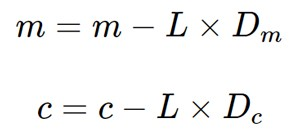

Derivative with respect to m
Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :

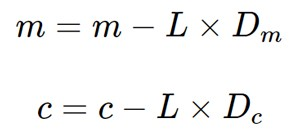

Derivative with respect to c
3. Now we update the current value of m and c using the following equation:

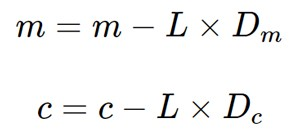

4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

Now going back to our analogy, m can be considered the current position of the person. D is equivalent to the steepness of the slope and L can be the speed with which he moves. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
Now with the optimum value of m and c our model is ready to make predictions !

In [3]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("/Users/malarvizhis/Desktop/linear_regression_live-master/data.csv", delimiter=",")
    learning_rate = 0.001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 100
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}",initial_b, initial_m)
    print("****",compute_error_for_line_given_points(initial_b, initial_m, points))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}",num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == "__main__":
    run()

('Starting gradient descent at b = {0}, m = {1}, error = {2}', 0, 0)
('****', 5565.107834483211)
Running...
('After {0} iterations b = {1}, m = {2}, error = {3}', 100, -3.1165582062514995e+58, -1.585655822608489e+60, 6.267874454306815e+123)
